In [44]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
# print('\n',boston_dataset.DESCR)



Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [46]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features.shape[1])
#-------- ВАШ КОД ТУТ -------------------

#print(np.dot(features, features.transpose()))
#print(np.ones((506,1)))
features = np.hstack((np.ones((506,1)), features))
print(features)
w_analytic = np.dot(np.dot(np.linalg.inv(np.dot(features.transpose(), features)),features.transpose()),y)

reg = LinearRegression().fit(features, y)
#print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")
print(f"Евклидово расстояние между наборами коэффициентов {norm(reg.coef_ - w_analytic)}\n")

#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

reg = LinearRegression().fit(features, y)
print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")
print(f"Евклидово расстояние между наборами коэффициентов {norm(reg.coef_ - w_analytic)}\n")

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Евклидово расстояние между наборами коэффициентов 36.45948838506836

Аналитически определённые коэффициенты [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
Коэффициенты, вычисленные моделью sklearn [ 0.00000000e+00 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-0

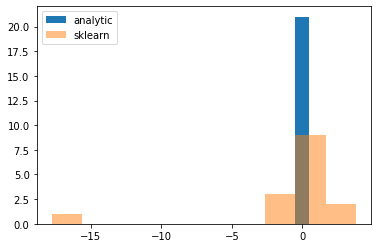

In [42]:
from matplotlib import pyplot as plt

plt.hist(w_analytic, alpha=1, bins='auto', label='analytic')
plt.hist(reg.coef_, alpha=0.5, label='sklearn')
plt.legend(loc='upper left')
plt.show()